# **Traditional ML Approach**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data=pd.read_csv('train_data.csv')

In [ ]:
train_data.head(2)

,text,stars,sentiment,length,subjectivity,char_count,word_count,word_density
0,Total bill for this horrible service Over Gs T...,1.0,0,191,0.616667,191,36,5.162162
1,I adore Travis at the Hard Rocks new Kelly Car...,5.0,1,1511,0.536668,1511,270,5.575646


In [ ]:
# Text processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

**Naive Bayes Classifier**

In [ ]:
def get_model_creation_evaluation():
  #Function for model creation and Evaluation
  df=pd.read_csv('train_data.csv')
  train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
  # Vectorize the processed text data using TF-IDF
  vectorizer = TfidfVectorizer(max_features=5000)
  X_train = vectorizer.fit_transform(train_data['text'])
  X_test = vectorizer.transform(test_data['text'])
  # Split the data into features (X) and target (y)
  X = df['text']
  y = df['sentiment']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Vectorize the processed text data using TF-IDF
  vectorizer = TfidfVectorizer(max_features=5000)
  X_train_vec = vectorizer.fit_transform(X_train)
  X_test_vec = vectorizer.transform(X_test)
  # Train a Naive Bayes classifier
  classifier = MultinomialNB()
  classifier.fit(X_train_vec, y_train)

  # Make predictions on the test set
  predictions = classifier.predict(X_test_vec)
  # Evaluate the model
  print("\nClassification Report:\n", classification_report(y_test, predictions))
  print("Accuracy:", accuracy_score(y_test, predictions))
  # Confusion Matrix
  conf_mat = confusion_matrix(y_test, predictions)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.75      2273
           1       0.89      0.98      0.93      6633

    accuracy                           0.89      8906
   macro avg       0.90      0.81      0.84      8906
weighted avg       0.89      0.89      0.88      8906

Accuracy: 0.8910846620256008


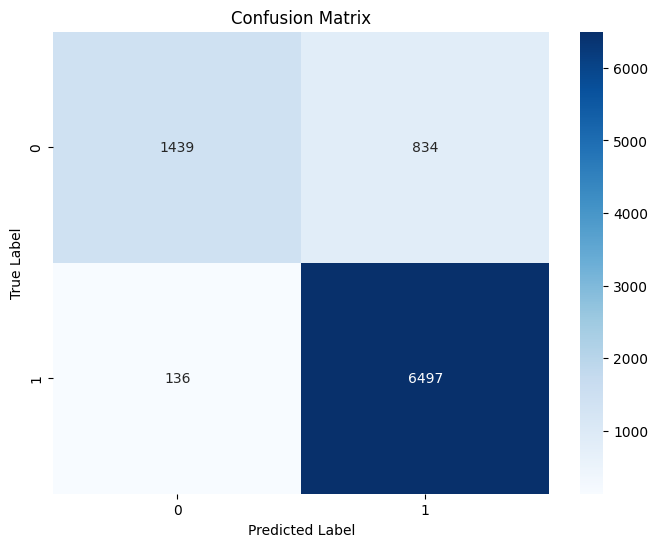

In [ ]:
get_model_creation_evaluation()

# **Randomforest Classifier alogirithm**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dataset_path = "/content/train_data.csv"
topical_chat_data = pd.read_csv(dataset_path)
topical_chat_data['text']=topical_chat_data['text'].astype(str)

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(topical_chat_data, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and a machine learning classifier
model = make_pipeline(
    TfidfVectorizer(max_features=5000),
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")  # Handling class imbalance with class_weight
)


In [ ]:
# Train the model
model.fit(train_data['text'], train_data['sentiment'])

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# Predict on the test set
predictions = model.predict(test_data['text'])

# Evaluate the model
print(classification_report(test_data['sentiment'], predictions))
print(confusion_matrix(test_data['sentiment'], predictions))

              precision    recall  f1-score   support

           0       0.92      0.61      0.74      2273
           1       0.88      0.98      0.93      6633

    accuracy                           0.89      8906
   macro avg       0.90      0.80      0.83      8906
weighted avg       0.89      0.89      0.88      8906

[[1393  880]
 [ 114 6519]]


# **Xgboost Classifier alogirithm**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have your DataFrame named 'df'
df=pd.read_csv('train_data.csv')
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creating XGBoost model
model = XGBClassifier()
model.fit(X_train_vectorized, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", report)


Accuracy: 0.9207275993712104
Confusion Matrix:
 [[1773  500]
 [ 206 6427]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      2273
           1       0.93      0.97      0.95      6633

    accuracy                           0.92      8906
   macro avg       0.91      0.87      0.89      8906
weighted avg       0.92      0.92      0.92      8906

